In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(27, 17)

In [6]:
df_states.shape

(1373, 17)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,posNeg,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
4,2020-03-26,56,80735,438603,519338,60251,10131.0,1163.0,579589,77e73bd9ca5316e76685e4fd31fd7adbd7ba4f45,2020-03-26T20:00:00Z,519338,263.0,3995.0,80999.0,16807.0,97806.0
3,2020-03-27,56,99413,527220,626633,60094,13718.0,1530.0,686727,5e9611f927d035074ac65594ad30669ef8299d75,2020-03-27T20:00:00Z,626633,367.0,3587.0,88617.0,18678.0,107295.0
2,2020-03-28,56,118234,617470,735704,65712,16729.0,1965.0,801416,a54933aec2de2cb0f418ffbc85c6c58d7481be77,2020-03-28T20:00:00Z,735704,435.0,3011.0,90250.0,18821.0,109071.0
1,2020-03-29,56,139061,692290,831351,65549,19730.0,2428.0,896900,0bcb1178e16a889408a98222caae4bd49fe3d9b8,2020-03-29T20:00:00Z,831351,463.0,3001.0,74820.0,20827.0,95647.0
0,2020-03-30,56,160530,784324,944854,65382,22303.0,2939.0,1010236,5d6b80da84d18b345f21f914f55a72520c680310,2020-03-30T20:00:00Z,944854,511.0,2573.0,92034.0,21469.0,113503.0


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
32,2020-03-30,NE,145.0,2584.0,5.0,NaN,2.0,2734,0c58e08648aee3a53c4792f6cdc74ed4e5ce7972,2020-03-30T20:00:00Z,2729,31,0.0,0.0,616.0,37.0,653.0
31,2020-03-30,ND,109.0,3728.0,NaN,19.0,2.0,3837,cfcbf61c70b77166c3522494628f1764fb30385e,2020-03-30T20:00:00Z,3837,38,1.0,2.0,373.0,11.0,384.0
30,2020-03-30,NC,1307.0,19557.0,NaN,137.0,6.0,20864,77104c17259e8ee4b4132638cd3d1dac2db69bc3,2020-03-30T20:00:00Z,20864,37,2.0,46.0,1652.0,267.0,1919.0
28,2020-03-30,MS,847.0,2989.0,NaN,195.0,16.0,3836,e87173d3b41aa192738e66076d17fc5675ce950b,2020-03-30T20:00:00Z,3836,28,2.0,-40.0,429.0,89.0,518.0
0,2020-03-30,AK,114.0,3540.0,NaN,7.0,3.0,3654,01a1c96fd2ed214d8747ab778c2fec7203c8cd2f,2020-03-30T20:00:00Z,3654,2,1.0,1.0,308.0,12.0,320.0


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate percent of population tested
df_states['test_rate'] = df_states['total'] / df_states['population']

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,...,negativeIncrease,positiveIncrease,totalTestResultsIncrease,state_name,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
1308,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,18fc4cee9e62382b649645f5fb862fd1598ad7c2,2020-03-11T20:00:00Z,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1309,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,0.0,ac695ca11cd43d13514370bf495bb3af78f1b66f,2020-03-10T20:00:00Z,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,0.0
1310,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,1306b115d298a86cb3e626a0d975e35767198712,2020-03-09T20:00:00Z,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1311,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,3c360a7f81ed305bc73fb5dfbc07aec951489c2f,2020-03-08T20:00:00Z,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1312,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,d311061ed771387fdb2db7b876bf2f72435f0de7,2020-03-07T21:00:00Z,...,NaN,NaN,NaN,Wyoming,56,577737,5.950611,0.0,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalized,death,total,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
count,1313.000000,1208.000000,422.000000,261.000000,649.000000,1208.000000,1313.000000,1313.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1313.000000,1.313000e+03,1298.000000,1313.000000,1203.000000,1208.000000
mean,662.009901,3918.009934,1004.819905,386.862069,20.947612,4636.342715,4266.698401,29.483625,2.330690,17.724822,620.799366,127.126883,747.925456,29.483625,6.560401e+06,430.351726,0.000075,0.125740,0.000803
std,3665.403067,9885.880947,7110.510141,1483.506622,77.685622,13277.824032,12797.047381,16.263922,13.502648,145.354562,1557.168545,583.931832,1974.222380,16.263922,7.385991e+06,1603.180637,0.000218,0.147686,0.001296
min,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-296.000000,-694.000000,-1.000000,-585.000000,1.000000,5.777370e+05,1.291523,0.000000,0.000000,0.000000
25%,6.000000,91.750000,4.000000,17.000000,1.000000,105.000000,64.000000,16.000000,0.000000,0.000000,0.000000,1.000000,11.000000,16.000000,1.805832e+06,54.955978,0.000002,0.041177,0.000026
50%,50.000000,500.000000,20.500000,61.000000,3.000000,612.000000,462.000000,29.000000,0.000000,0.000000,47.000000,11.000000,83.000000,29.000000,4.468402e+06,109.860468,0.000013,0.083056,0.000182
75%,264.000000,3238.000000,94.750000,184.000000,13.000000,3564.500000,3138.000000,42.000000,1.000000,0.000000,481.000000,54.000000,554.000000,42.000000,7.535591e+06,229.511156,0.000071,0.151779,0.001070
max,66497.000000,119971.000000,64400.000000,13721.000000,1218.000000,186468.000000,186468.000000,72.000000,253.000000,3039.000000,16272.000000,7683.000000,23649.000000,72.000000,3.955704e+07,11490.119540,0.003403,0.891705,0.009542


# United States Positive Cases

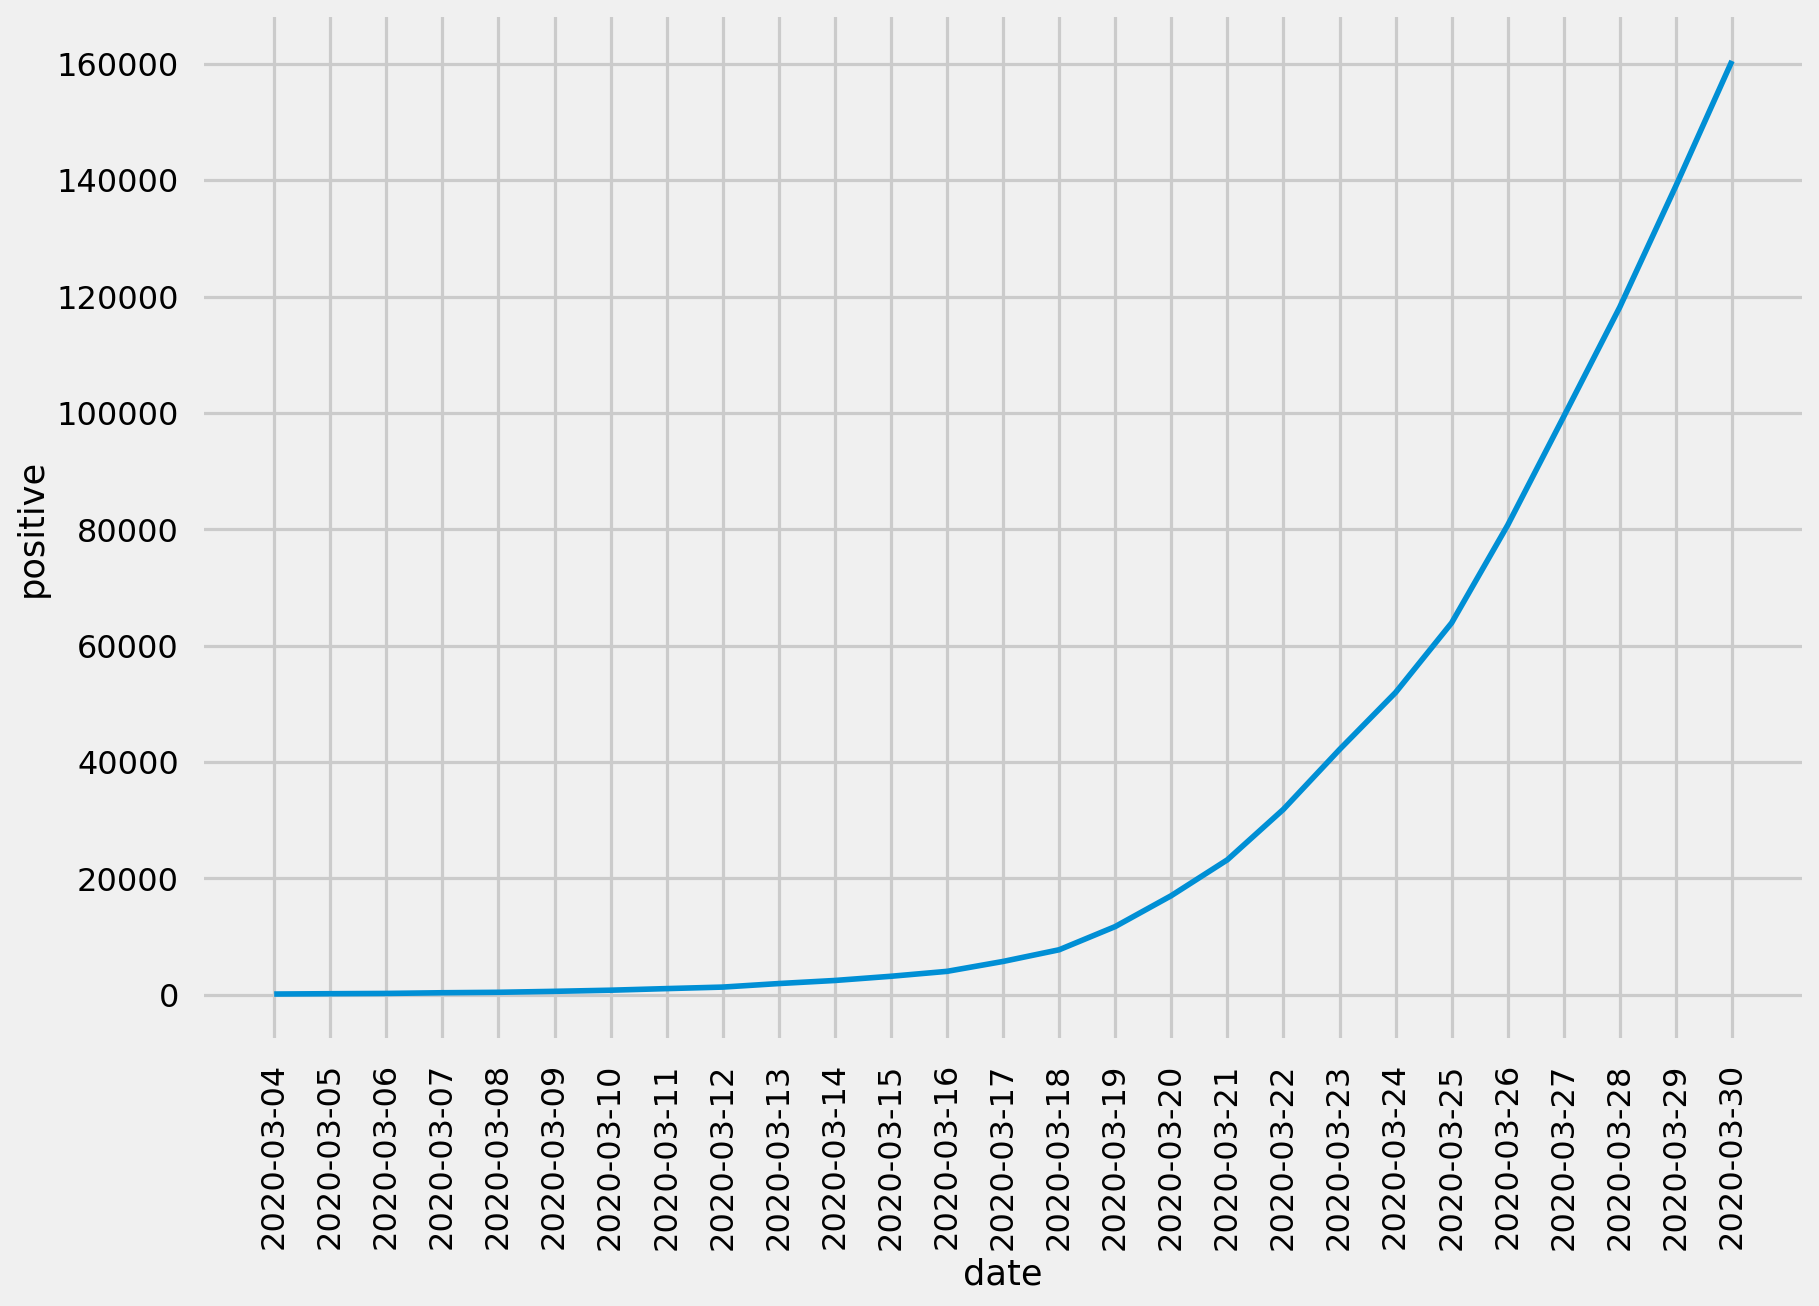

In [14]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  data=df_us)
ax.set(xticks=df_us.date.values)
plt.xticks(rotation=90)
plt.show()

# California Positive Cases

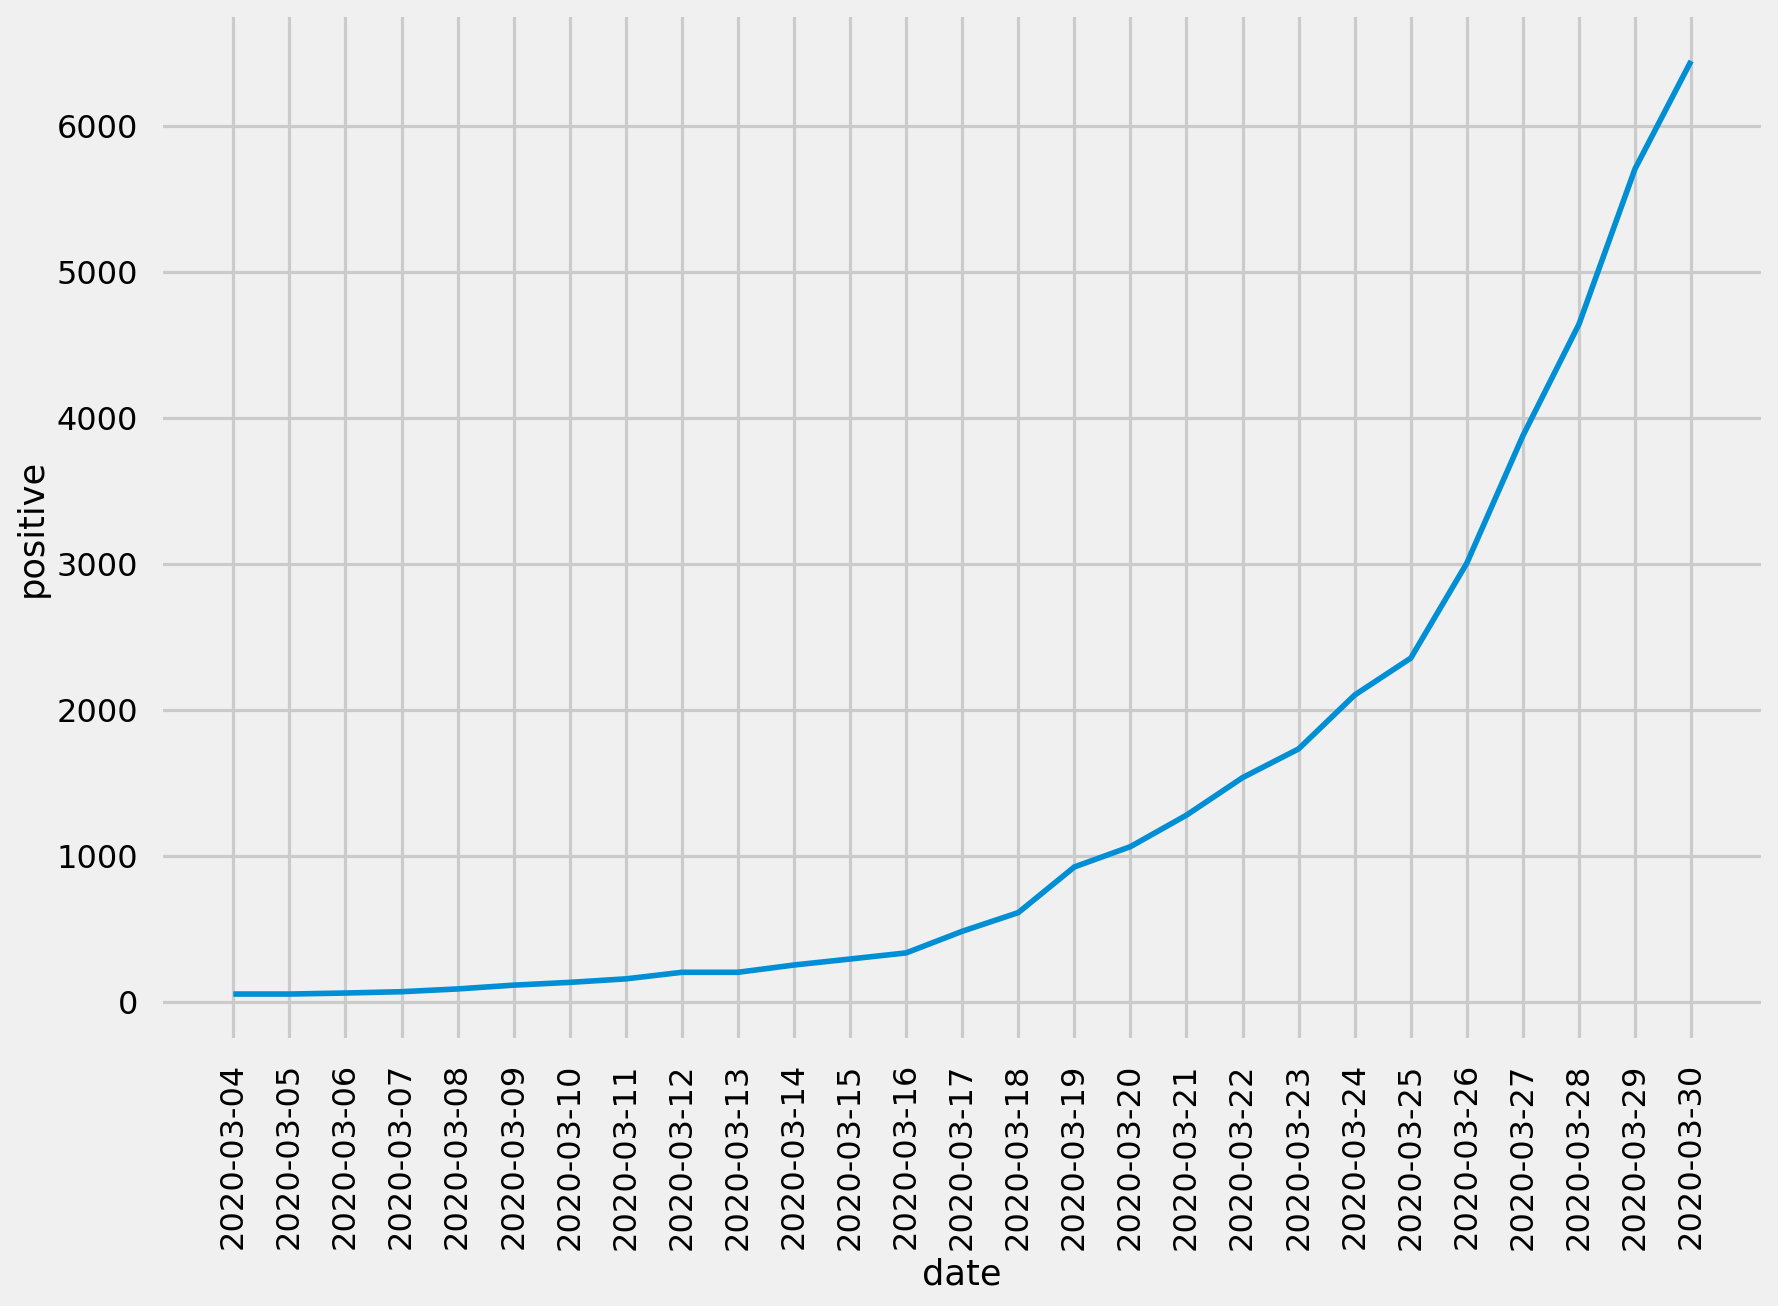

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

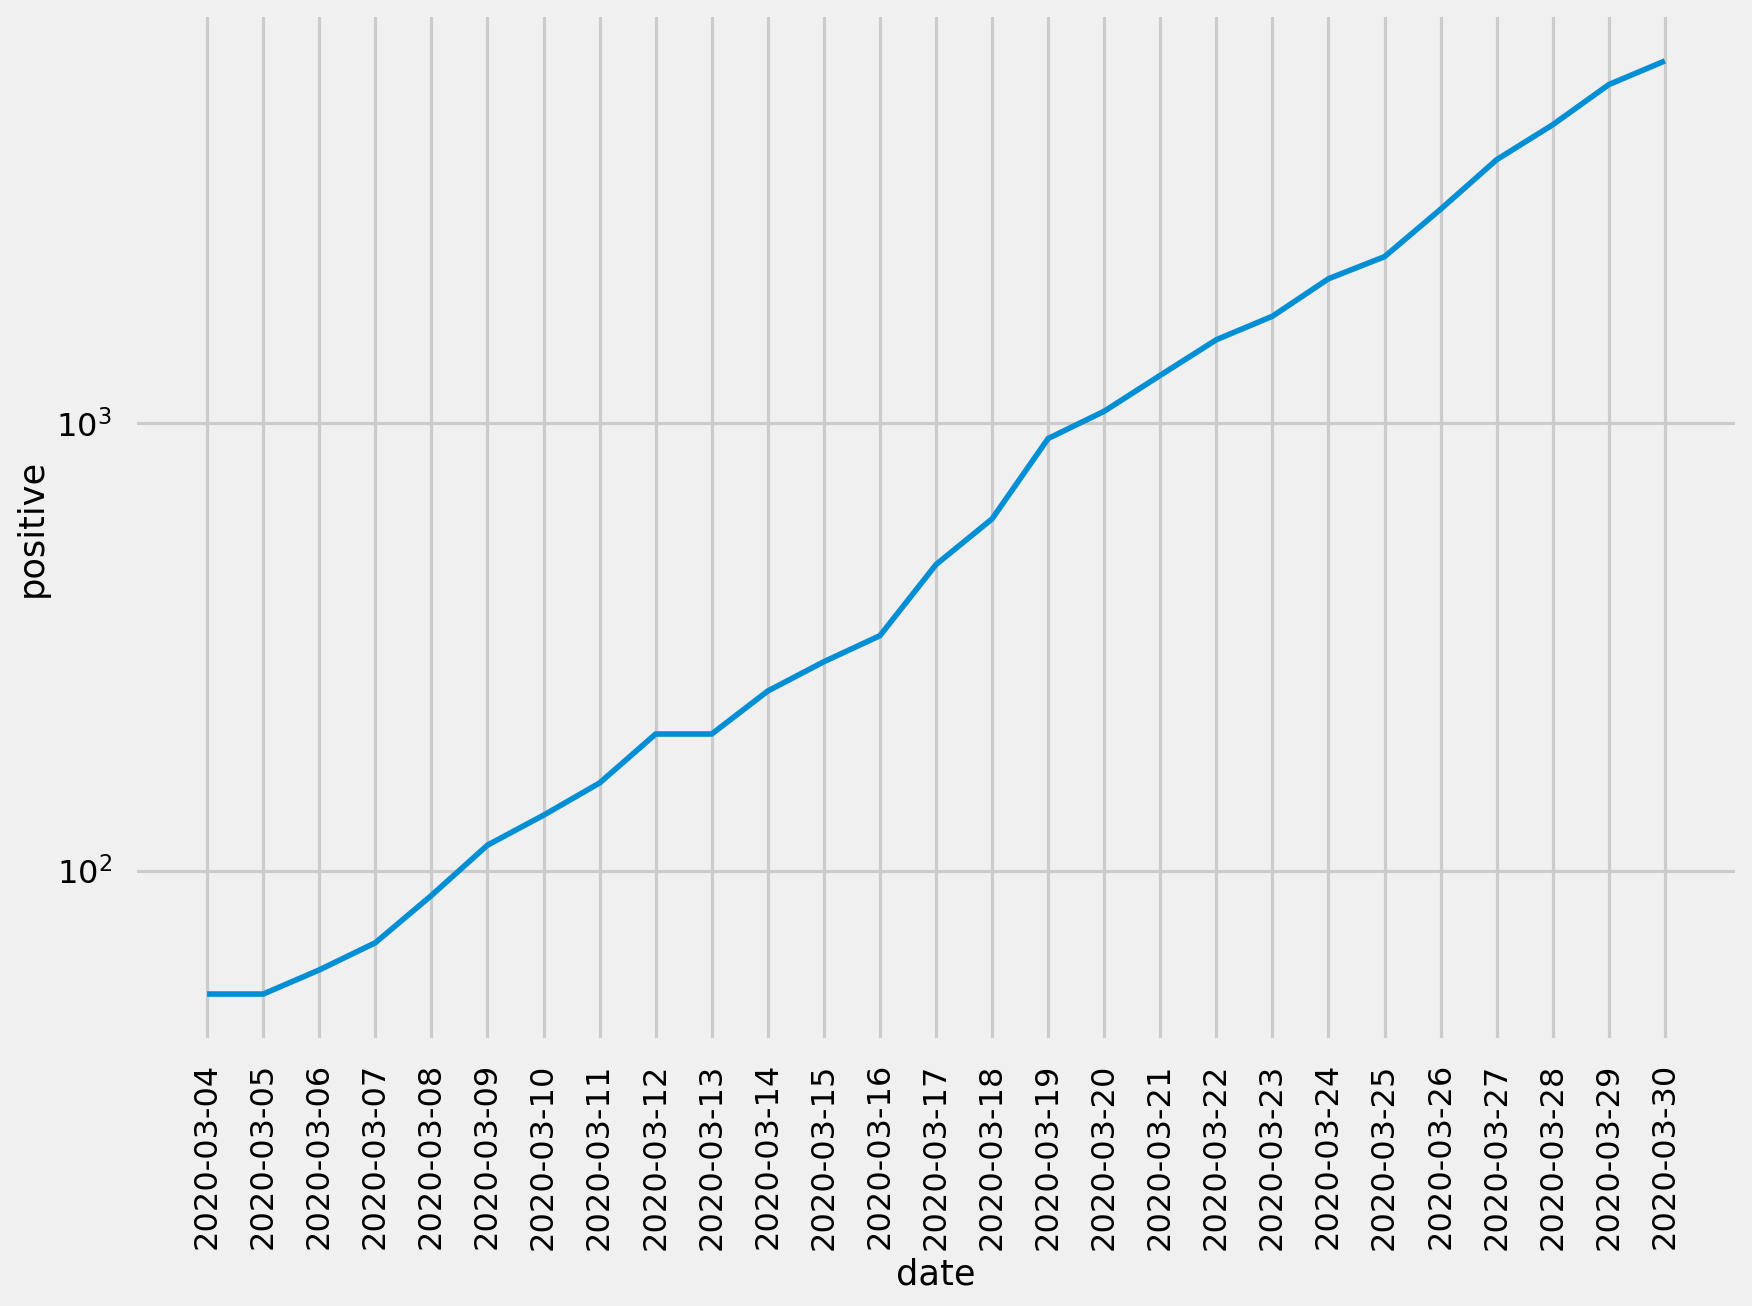

In [16]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## Positive and Total Tests

## California

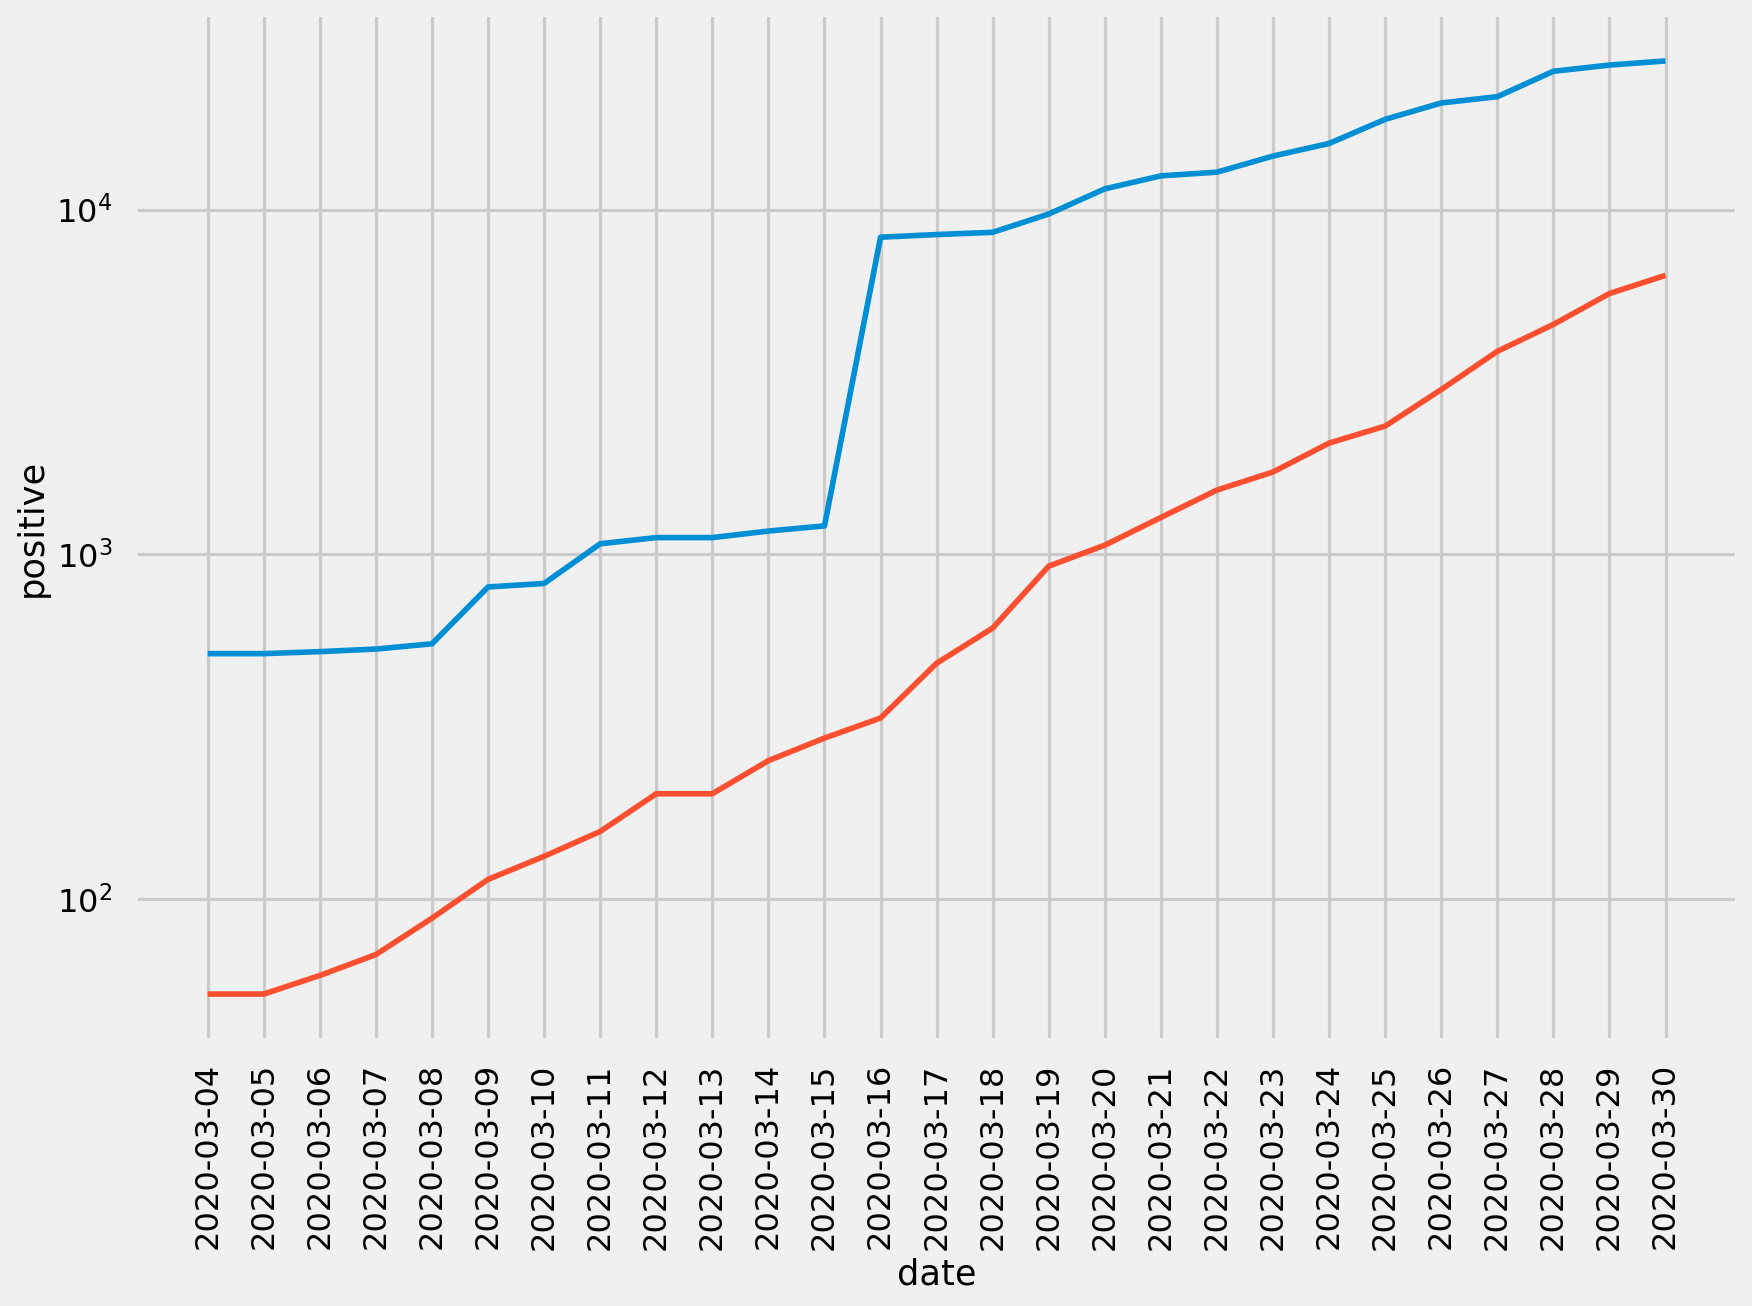

In [17]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## New York

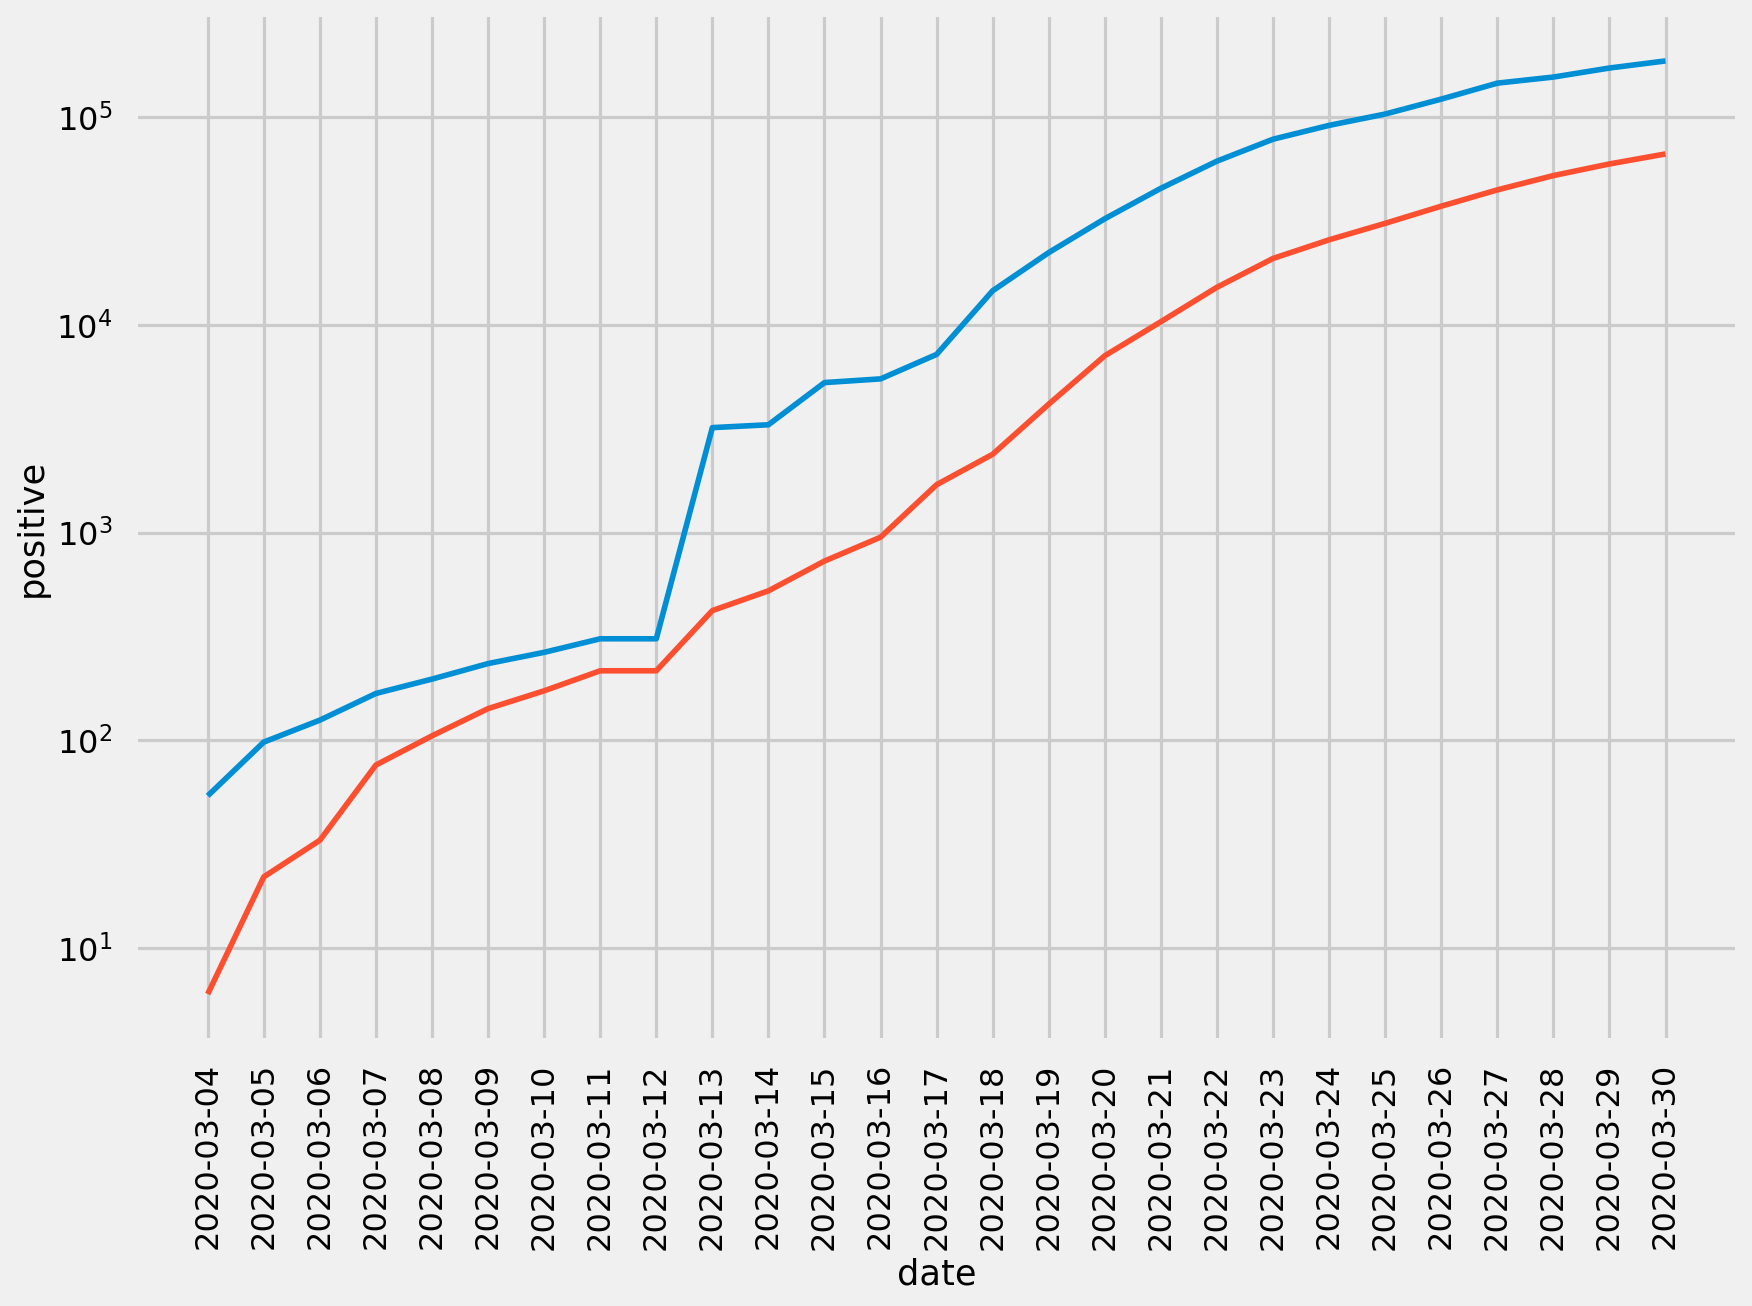

In [18]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

# Top 10 States

In [19]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='positive', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'MI', 'CA', 'MA', 'FL', 'IL', 'WA', 'PA', 'LA']

In [20]:
df_states.query('date == @latest_date').sort_values(by='positive', ascending=False)[['state', 'positive']]

,state,positive
863,NY,66497.0
786,NJ,16636.0
559,MI,6498.0
101,CA,6447.0
482,MA,5752.0
229,FL,5473.0
356,IL,5057.0
1210,WA,4896.0
967,PA,4087.0
458,LA,4025.0


# Top State Positive Cases (Log Scale)

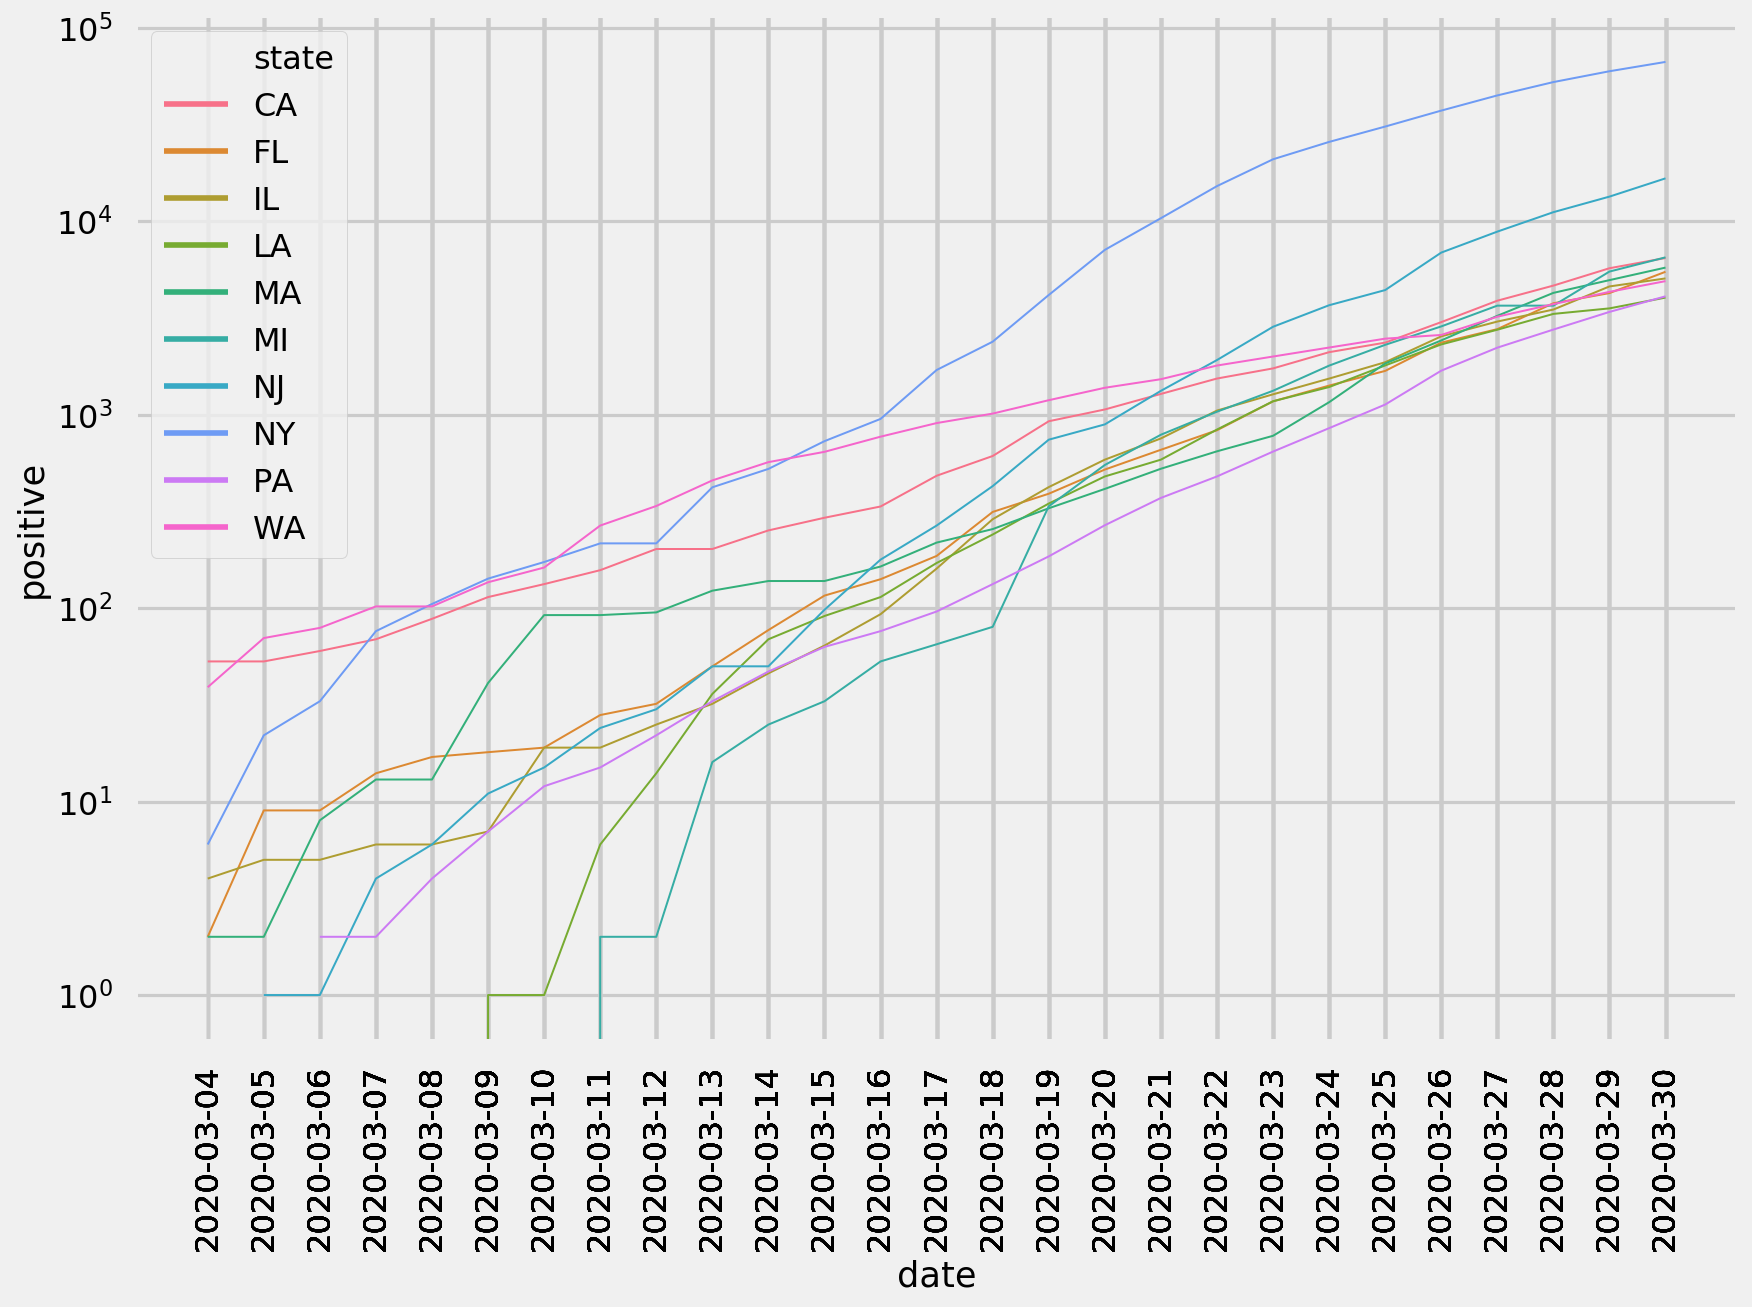

In [21]:
ax = sns.lineplot(x="date", y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population (Log Scale)

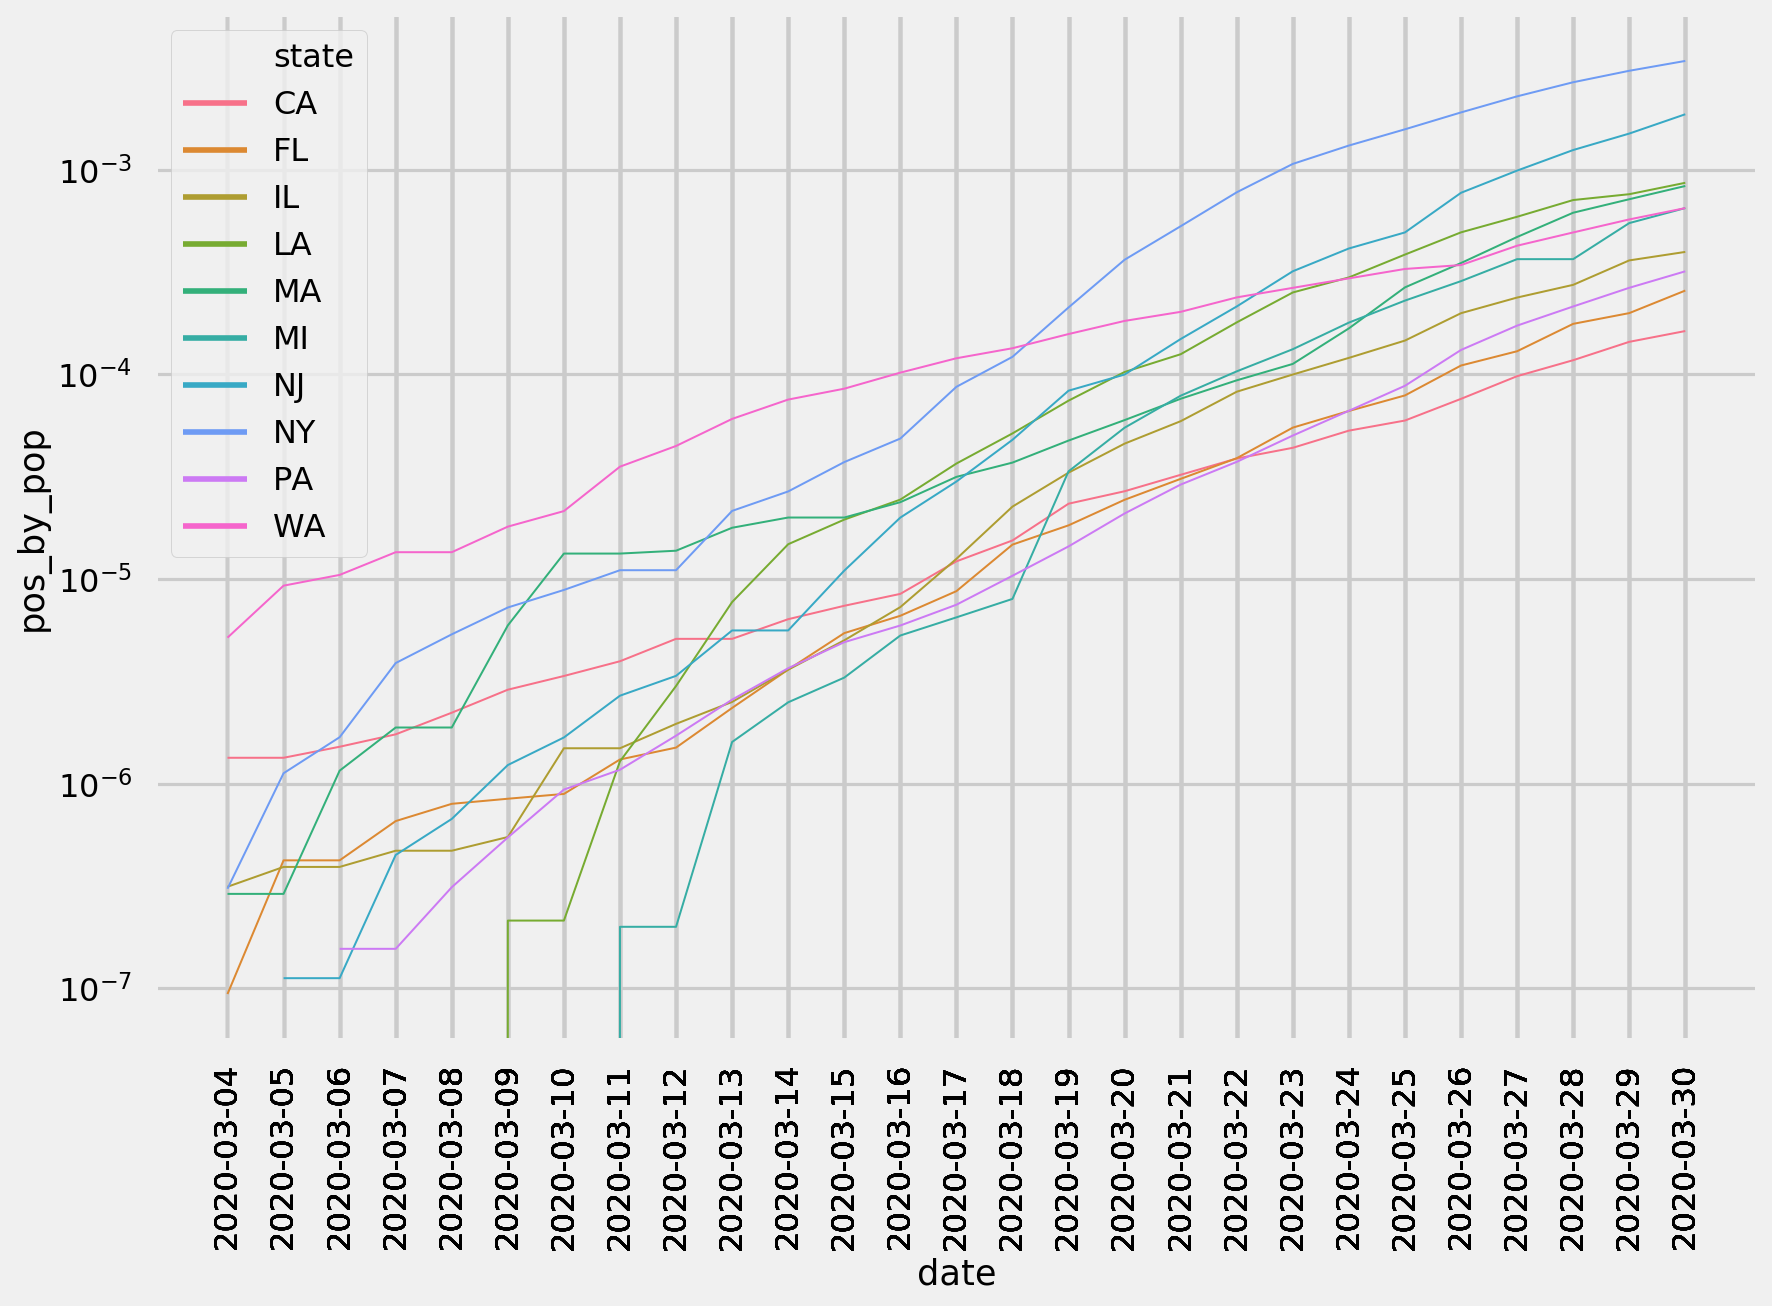

In [22]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Percentage of Population Tested

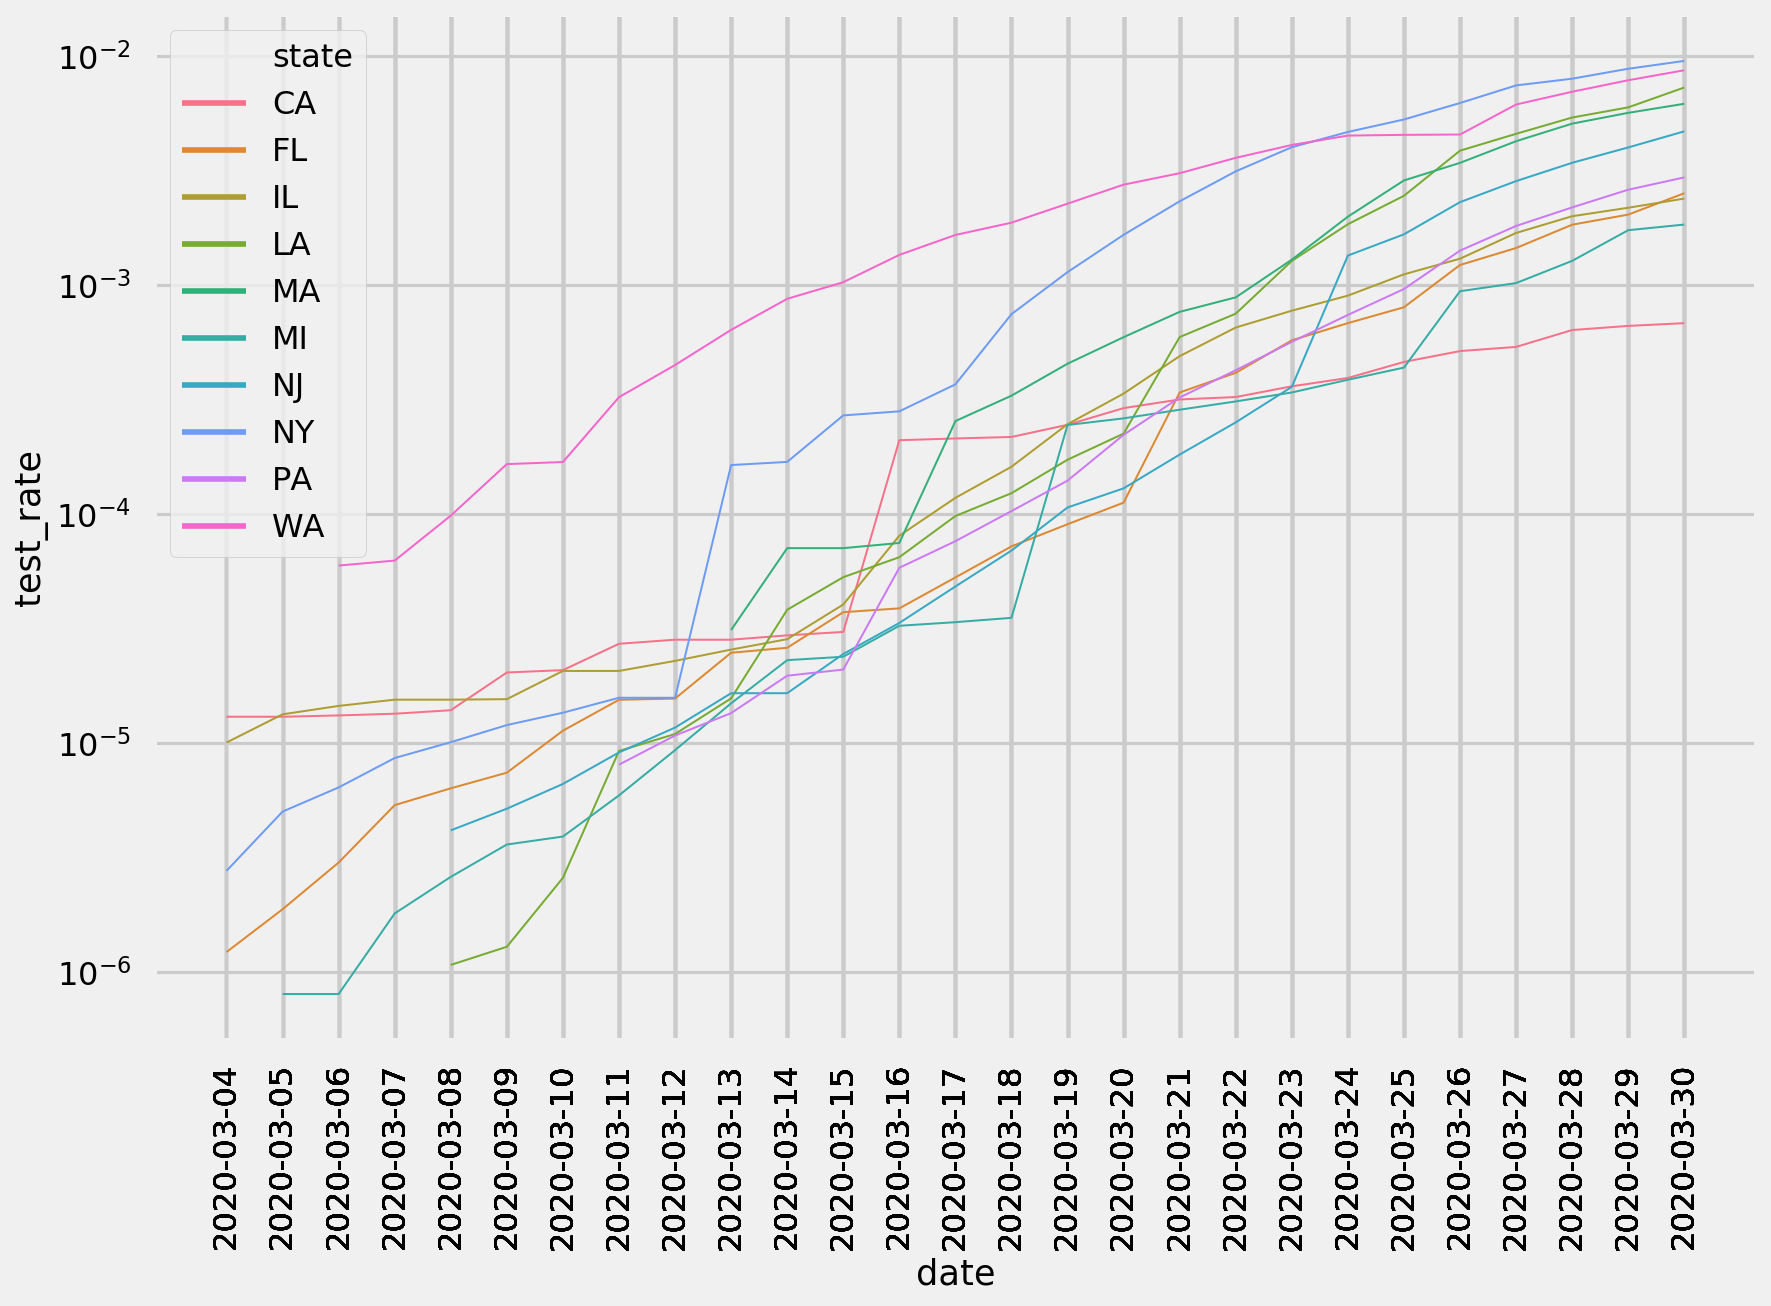

In [23]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()